# **Chapter 7. Secular Perturbations**

## **Action by Daniel Niño-Villegas, University of Antioquia**

In this notebook we will present part of the theoretical background of the chapter devoted to *Secular Perturbations* and some mathematical and numerical results which are interested for the theory.

For details on the theory please refer directly to the book:

> Murray, C. D., & Dermott, S. F. (1999). Solar system dynamics. Cambridge university press.

## Preliminaries

### Prerrequisites

In [1]:
#!pip install -q rebound

### Other libraries

In [2]:
#Global packages
import numpy as np
import matplotlib.pyplot as plt
import rebound as rb

#Specific modules and routines
from tqdm import tqdm

### Useful constants

In [3]:
deg = np.pi/180
rad = 1/deg

### Plots esthetic

In [4]:
%matplotlib nbagg
#If you run this in Colab use
#%matplotlib inline

plt.rcParams['text.usetex'] = True
#If you don't have installed latex
#font for matplotlib, set this parameter
#to false. If you run this in Colab, set
#the parameter to false.

## **Section 6.9.1    Secular Terms**

### Experiment: asteroid orbit perturbation due to Jupiter ()

Let's supose we have a little asteroid orbiting sun and that we want to analyse how his orbital elements are perturbated due to Jupiter's influence. We'll first make a numerical simulation using *Rebound* to see how orbital elements vary with time and then we'll compare this results with the theory that was developed in chapter 6. Initial conditions are described with detail in chapter 6.9.1.

Create the solar system with the Sun, Jupiter and the asteroid (whose mass doesn't care):

In [5]:
#Initial conditions
a0 = 0.192*5.204267
e0 = 0.1
Omega0 = 200*deg
pomega0 = 130*deg
lambda0 = 300*deg

#System creation
sim = rb.Simulation()
sim.units = ('au', 'msun', 'yr')
sim.add('Sun', hash='Sun')
sim.add(m=1/1047.355, a=5.204267, e=0.048, hash='Jupiter')
sim.add(m=1e-17, a=a0, e=e0, inc=1e-4*deg, 
        Omega=Omega0, pomega=pomega0, l=lambda0, hash='Asteroid')
sim.save('tmp/system.bin')

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 


Calcultate the asteorid and Jupiter's periods who are very useful:

In [6]:
#Orbital periods
Pjup = sim.particles['Jupiter'].P
njup = 2*np.pi/Pjup
Past = sim.particles['Asteroid'].P
nast = 2*np.pi/Past

The time step for integration will be a fraction of the asteroid's initial period, and the total integration time will be 20000 Jupiter periods:

In [7]:
#Integration parameters
sim.dt = Past/100
Nt = 1000
ts = np.linspace(0, 20000*Pjup, Nt)

Now let's do the integration (remember to be a little patient):

In [8]:
#Integration
Es = np.zeros((Nt,4))
for i,t in enumerate(tqdm(ts, position=0, leave=True)):
    sim.integrate(t)
    sim.move_to_hel()
    orbits = sim.calculate_orbits()
    Es[i] = [orbits[1].a,
             orbits[1].e,
             np.mod(orbits[1].pomega,2*np.pi),
             np.mod(orbits[1].Omega,2*np.pi)]

100%|█████████████████████████████████████████████████| 1000/1000 [02:18<00:00,  7.21it/s]


With the simulation done, let's plot $a, e, \varpi$ and $\Omega$ as a function of time:

<IPython.core.display.Javascript object>


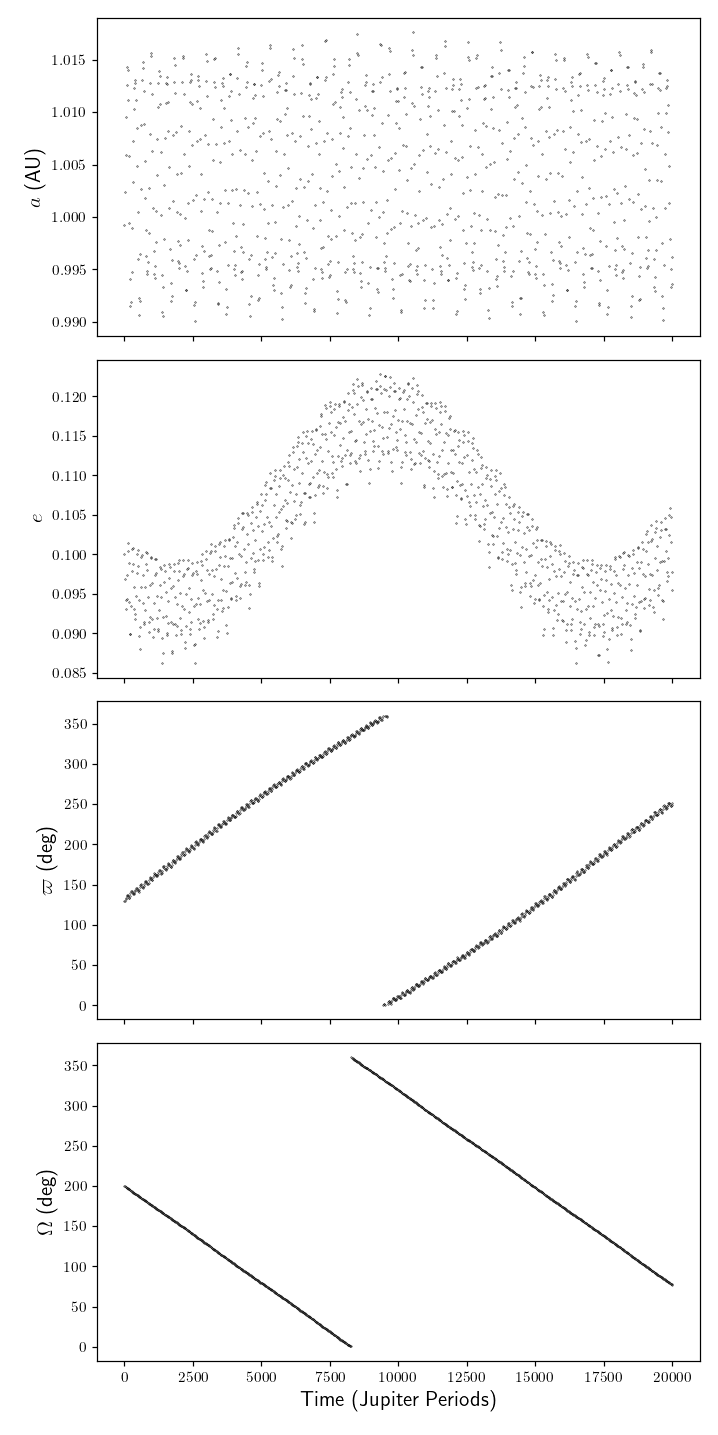

In [9]:
fig, axs = plt.subplots(4, 1, figsize=(6,12), sharex=True)
ax = fig.gca()
ax.set_xlabel('Time (Jupiter Periods)', fontsize=14)
axs[0].plot(ts/Pjup, Es[:,0], 'ko', ms=0.3);
axs[0].set_ylabel(r'$a$ (AU)', fontsize=14);
axs[1].plot(ts/Pjup, Es[:,1], 'ko', ms=0.3);
axs[1].set_ylabel(r'$e$', fontsize=14);
axs[2].plot(ts/Pjup, Es[:,2]*rad, 'ko', ms=0.3);
axs[2].set_ylabel(r'$\varpi$ (deg)', fontsize=14);
axs[3].plot(ts/Pjup, Es[:,3]*rad, 'ko', ms=0.3);
axs[3].set_ylabel(r'$\Omega$ (deg)', fontsize=14);
fig.tight_layout()
#plt.savefig('figs/orbital_elements.png',dpi=300)
plt.show()

As we see in the figure above, the orbital elements vary with time in very particular ways, so now we'll focus on how the theory can describe these behaviours using the results obtained in section 6. First of all, let's rember the series expansion to second order of the direct and indirect parts in the disturbing function of the perturbed object:


\begin{equation*}
\begin{aligned}
\mathcal{R}_{\mathrm{D}}= & \,\left(\frac{1}{2} b_{\frac{1}{2}}^{(j)}+\frac{1}{8}\left(e^2+e^{\prime 2}\right)\left[-4 j^2+2 \alpha D+\alpha^2 D^2\right] b_{\frac{1}{2}}^{(j)}\right. \\
& \left.+\frac{1}{4}\left(s^2+s^{\prime 2}\right)\left([-\alpha] b_{\frac{3}{2}}^{(j-1)}+[-\alpha] b_{\frac{3}{2}}^{(j+1)}\right)\right) \\
& \times \cos \left[j \lambda^{\prime}-j \lambda\right] \\
+ & \left(\frac{1}{4} e e^{\prime}\left[2+6 j+4 j^2-2 \alpha D-\alpha^2 D^2\right] b_{\frac{1}{2}}^{(j+1)}\right) \\
& \times \cos \left[j \lambda^{\prime}-j \lambda+\varpi^{\prime}-\varpi\right] \\
+ & \left(s s^{\prime}[\alpha] b_{\frac{3}{2}}^{(j+1)}\right) \cos \left[j \lambda^{\prime}-j \lambda+\Omega^{\prime}-\Omega\right] \\
+ & \left(\frac{1}{2} e[-2 j-\alpha D] b_{\frac{1}{2}}^{(j)}\right) \cos \left[j \lambda^{\prime}+(1-j) \lambda-\varpi\right] \\
+ & \left(\frac{1}{2} e^{\prime}[-1+2 j+\alpha D] b_{\frac{1}{2}}^{(j-1)}\right) \cos \left[j \lambda^{\prime}+(1-j) \lambda-\varpi^{\prime}\right] \\
+ & \left(\frac{1}{8} e^2\left[-5 j+4 j^2-2 \alpha D+4 j \alpha D+\alpha^2 D^2\right] b_{\frac{1}{2}}^{(j)}\right) \\
& \times \cos \left[j \lambda^{\prime}+(2-j) \lambda-2 \varpi\right] \\
+ & \left(\frac{1}{4} e e^{\prime}\left[-2+6 j-4 j^2+2 \alpha D-4 j \alpha D-\alpha^2 D^2\right] b_{\frac{1}{2}}^{(j-1)}\right) \\
& \times \cos \left[j \lambda^{\prime}+(2-j) \lambda-\varpi^{\prime}-\varpi\right] \\
+ & \left(\frac{1}{8} e^{\prime 2}\left[2-7 j+4 j^2-2 \alpha D+4 j \alpha D+\alpha^2 D^2\right] b_{\frac{1}{2}}^{(j-2)}\right) \\
& \times \cos \left[j \lambda^{\prime}+(2-j) \lambda-2 \varpi^{\prime}\right] \\
+ & \left(\frac{1}{2} s^2[\alpha] b_{\frac{3}{2}}^{(j-1)}\right) \\
& \times \cos \left[j \lambda^{\prime}+(2-j) \lambda-2 \Omega\right] \\
+ & \left(s s^{\prime}[-\alpha] b_{\frac{3}{2}}^{(j-1)}\right) \cos \left[j \lambda^{\prime}+(2-j) \lambda-\Omega^{\prime}-\Omega\right] \\
+ & \left(\frac{1}{2} s^{\prime 2}[\alpha] b_{\frac{3}{2}}^{(j-1)}\right) \cos \left[j \lambda^{\prime}+(2-j) \lambda-2 \Omega^{\prime}\right]
\end{aligned}
\label{eq:dist_func_dir}\tag{1}
\end{equation*}

\begin{equation*}
\begin{aligned}
\mathcal{R}_{\mathrm{E}}= & -\frac{r}{a}\left(\frac{a^{\prime}}{r^{\prime}}\right)^2 \cos \psi \\
\approx & \left(-1+\frac{1}{2} e^2+\frac{1}{2} e^{\prime 2}+s^2+s^{\prime 2}\right) \cos \left[\lambda^{\prime}-\lambda\right] \\
& -e e^{\prime} \cos \left[2 \lambda^{\prime}-2 \lambda-\varpi^{\prime}+\varpi\right]-2 s s^{\prime} \cos \left[\lambda^{\prime}-\lambda-\Omega^{\prime}+\Omega\right] \\
& -\frac{1}{2} e \cos \left[\lambda^{\prime}-2 \lambda+\varpi\right]+\frac{3}{2} e \cos \left[\lambda^{\prime}-\varpi\right]-2 e^{\prime} \cos \left[2 \lambda^{\prime}-\lambda-\varpi^{\prime}\right] \\
& -\frac{3}{8} e^2 \cos \left[\lambda^{\prime}-3 \lambda+2 \varpi\right]-\frac{1}{8} e^2 \cos \left[\lambda^{\prime}+\lambda-2 \varpi\right] \\
& +3 e e^{\prime} \cos \left[2 \lambda-\varpi^{\prime}-\varpi\right]-\frac{1}{8} e^{\prime 2} \cos \left[\lambda^{\prime}+\lambda-2 \varpi^{\prime}\right] \\
& -\frac{27}{8} e^{\prime 2} \cos \left[3 \lambda^{\prime}-\lambda-2 \varpi^{\prime}\right]-s^2 \cos \left[\lambda^{\prime}+\lambda-2 \Omega\right] \\
& +2 s s^{\prime} \cos \left[\lambda^{\prime}+\lambda-\Omega^{\prime}-\Omega\right]-s^{\prime 2} \cos \left[\lambda^{\prime}+\lambda-2 \Omega^{\prime}\right]
\end{aligned}
\label{eq:dist_func_indir}\tag{2}
\end{equation*}

If we want to describe the secular behaviour of the perturbations we then only consider the secular terms in both expansions, that is, the terms who do not contain the mean longitudes $\lambda$ and $\lambda'$. This simplification is done because the mean longitudes are proportional to the time ($\lambda = nt + \epsilon$), so they will have little period oscillations that for secular purposes are not needed. Secular terms in the direct part are then obtained by setting $j = 0$ in the cosine arguments containing $j\lambda - j\lambda$, and discarding the remaing terms who depend on $\lambda$ or $\lambda'$:

\begin{equation*}
\begin{aligned}
\left\langle\mathcal{R}_{\mathrm{D}}\right\rangle = & \,\left(\frac{1}{2} b_{\frac{1}{2}}^{(0)}+\frac{1}{8}\left(e^2+e^{\prime 2}\right)\left[2 \alpha D+\alpha^2 D^2\right] b_{\frac{1}{2}}^{(0)}\right. \\
& \left.+\frac{1}{4} s^2\left([-\alpha] b_{\frac{3}{2}}^{(-1)}+[-\alpha] b_{\frac{3}{2}}^{(1)}\right)\right) \\
+ & \left(\frac{1}{4} e e^{\prime}\left[2-2 \alpha D-\alpha^2 D^2\right] b_{\frac{1}{2}}^{(1)}\right) \\
& \times \cos \left[\varpi^{\prime}-\varpi\right] \\
\end{aligned}
\tag{3}
\end{equation*}

It was used that Jupiter's orbital plane is the reference plane, so $s' = 0$. Using $b_{\frac{3}{2}}^{(-1)} = b_{\frac{3}{2}}^{(1)}$:

\begin{equation*}
\begin{aligned}
\left\langle\mathcal{R}_{\mathrm{D}}\right\rangle = & \, \frac{1}{2} b_{\frac{1}{2}}^{(0)} + \frac{1}{8}\left(e^2+e^{\prime 2}\right)\left[2 \alpha D+\alpha^2 D^2\right] b_{\frac{1}{2}}^{(0)} - \frac{1}{2} \alpha b_{\frac{3}{2}}^{(1)} s^2 \\
+ & \left(\frac{1}{4} e e^{\prime}\left[2-2 \alpha D-\alpha^2 D^2\right] b_{\frac{1}{2}}^{(1)}\right) \cos \left[\varpi^{\prime}-\varpi\right] \\
\end{aligned}
\tag{3}
\end{equation*}

This result can be condensed as:

\begin{equation*}
\left\langle\mathcal{R}_{\mathrm{D}}\right\rangle = C_0+C_1\left(e^2+e^{\prime 2}\right)+C_2 s^2+C_3 e e^{\prime} \cos \left(\varpi^{\prime}-\varpi\right)
\label{eq:mean_RD}\tag{4}
\end{equation*}

Where:

\begin{equation*}
\begin{aligned}
C_0 & =\frac{1}{2} b_{\frac{1}{2}}^{(0)}(\alpha) \\ 
C_1 & =\frac{1}{8}\left[2 \alpha D+\alpha^2 D^2\right] b_{\frac{1}{2}}^{(0)}(\alpha) \\
C_2 & =-\frac{1}{2} \alpha b_{\frac{3}{2}}^{(1)}(\alpha) \\
C_3 & =\frac{1}{4}\left[2-2 \alpha D-\alpha^2 D^2\right] b_{\frac{1}{2}}^{(1)}(\alpha) 
\end{aligned}
\tag{5}
\end{equation*}

If we check the indirect part in Eq. \eqref{eq:dist_func_indir} we see that all terms depend on $\lambda$ and $\lambda'$, so there are no secular contributions from this part to the disturbing function. That is:

\begin{equation*}
\left\langle\mathcal{R}_{\mathrm{E}}\right\rangle = 0
\label{eq:mean_RE}\tag{6}
\end{equation*}

Now, using Eq. \eqref{eq:mean_RD} and Eq. \eqref{eq:mean_RE} we find out that:

\begin{equation*}
\left\langle R \right\rangle = \frac{\mu'}{a'} \left( C_0+C_1\left(e^2+e^{\prime 2}\right)+C_2 s^2+C_3 e e^{\prime} \cos \left(\varpi^{\prime}-\varpi\right) \right) 
\tag{7}\label{eq:mean_dist}
\end{equation*}

Now we've found the expression for the (mean) disturbing function, we need to use the *Lagrange planetary equations* to find the osculating orbital elements as a function of time. The equations are shown below:

\begin{equation*}
\begin{aligned}
\frac{\mathrm{d} a}{\mathrm{~d} t} &=\frac{2}{n a} \frac{\partial \mathcal{R}}{\partial \epsilon} \\
\frac{\mathrm{d} e}{\mathrm{~d} t} &=-\frac{\sqrt{1-e^2}}{n a^2 e}\left(1-\sqrt{1-e^2}\right) \frac{\partial \mathcal{R}}{\partial \epsilon}-\frac{\sqrt{1-e^2}}{n a^2 e} \frac{\partial \mathcal{R}}{\partial \varpi} \\
\frac{\mathrm{d} \epsilon}{\mathrm{d} t} & =-\frac{2}{n a} \frac{\partial R}{\partial a}+\frac{\sqrt{1-e^2}\left(1-\sqrt{1-e^2}\right)}{n a^2 e} \frac{\partial \mathcal{R}}{\partial e}+\frac{\tan \frac{1}{2} I}{n a^2 \sqrt{1-e^2}} \frac{\partial \mathcal{R}}{\partial I} \\
\frac{\mathrm{d} \Omega}{\mathrm{d} t} & =\frac{1}{n a^2 \sqrt{1-e^2} \sin I} \frac{\partial \mathcal{R}}{\partial I} \\
\frac{\mathrm{d} \varpi}{\mathrm{d} t} & =\frac{\sqrt{1-e^2}}{n a^2 e} \frac{\partial \mathcal{R}}{\partial e}+\frac{\tan \frac{1}{2} I}{n a^2 \sqrt{1-e^2}} \frac{\partial \mathcal{R}}{\partial I} \\
\frac{\mathrm{d} I}{\mathrm{~d} t} & =\frac{-\tan \frac{1}{2} I}{n a^2 \sqrt{1-e^2}}\left(\frac{\partial \mathcal{R}}{\partial \epsilon}+\frac{\partial \mathcal{R}}{\partial \varpi}\right)-\frac{1}{n a^2 \sqrt{1-e^2} \sin I} \frac{\partial \mathcal{R}}{\partial \Omega} .
\end{aligned}
\tag{8}
\end{equation*}

Where we've introduced the $\epsilon$ variable, who's defined as:

\begin{equation*}
\begin{aligned}
\lambda & = M + \varpi \\ 
& = n(t-\tau) + \varpi \\
& = nt + (\varpi - n\tau) \\
& = nt + \epsilon \\
\end{aligned}
\end{equation*}

\begin{equation*}
\therefore \epsilon \equiv \varpi - n\tau
\tag{9}
\end{equation*}

If we suppose that $e \ll 1$ and $I \ll 1$, the Lagrange equations reduce to:

\begin{equation*}
\begin{aligned}
\frac{\mathrm{d} a}{\mathrm{d} t} & =\frac{2}{n a} \frac{\partial\langle\mathcal{R}\rangle}{\partial \lambda} \\
\frac{\mathrm{d} e}{\mathrm{d} t} & =-\frac{1}{n a^2 e} \frac{\partial\langle\mathcal{R}\rangle}{\partial \varpi} \\
\frac{\mathrm{d} \varpi}{\mathrm{d} t} & =+\frac{1}{n a^2 e} \frac{\partial\langle\mathcal{R}\rangle}{\partial e} \\
\frac{\mathrm{d} \Omega}{\mathrm{d} t} & =+\frac{1}{n a^2 \sin I} \frac{\partial\langle\mathcal{R}\rangle}{\partial I}
\end{aligned}
\label{eq:red_lagrange}\tag{10}
\end{equation*}

Introducing Eq. \eqref{eq:mean_dist} in Eqs. \eqref{eq:red_lagrange} and remembering that $n^2 a^3 \approx G m_c$ we found the next set of differential equations:

\begin{equation*}
\begin{aligned}
\left(\frac{\mathrm{d} a}{\mathrm{~d} t}\right)_{\mathrm{sec}} & =0 \\
\left(\frac{\mathrm{d} e}{\mathrm{~d} t}\right)_{\mathrm{sec}} & =n \alpha\left(m^{\prime} / m_{\mathrm{c}}\right) C_3 e^{\prime} \sin \left(\varpi-\varpi^{\prime}\right) \\
\left(\frac{\mathrm{d} \varpi}{\mathrm{d} t}\right)_{\mathrm{sec}} & =n \alpha\left(m^{\prime} / m_{\mathrm{c}}\right)\left[2 C_1+C_3\left(e^{\prime} / e\right) \cos \left(\varpi-\varpi^{\prime}\right)\right] \\
\left(\frac{\mathrm{d} \Omega}{\mathrm{d} t}\right)_{\mathrm{sec}} & =n \alpha\left(m^{\prime} / m_{\mathrm{c}}\right)\left(C_2 / 2\right)
\end{aligned}
\label{eq:dif_oscul}\tag{11}
\end{equation*}

If we now suppose that $e \ll e'$ and $\varpi' = 0$ we can integrate easily Eqs. \eqref{eq:dif_oscul} to:

\begin{equation*}
\begin{aligned}
a & =a_0 \\
e & =e_0-\frac{n \alpha}{\dot{\varpi}}\left(m^{\prime} / m_{\mathrm{c}}\right) C_3 e^{\prime}\left[\cos \varpi_0-\cos \varpi\right] \\
\varpi & =\varpi_0+n \alpha\left(m^{\prime} / m_{\mathrm{c}}\right) 2 C_1 t \\
\Omega & =\Omega_0+n \alpha\left(m^{\prime} / m_{\mathrm{c}}\right)\left(C_2 / 2\right) t
\end{aligned}
\tag{12}
\end{equation*}

Where $a_0, e_0, \varpi_0$ and $\Omega_0$ are the initial conditions. In this equations we see that up to second order in the excentricities:

* The semimajor axis of the asteroid remains constant in time.
* The excentricity oscillates in a sinusoidal way around a center value.
* $\varpi$ grows linearly with time supposing $C_1 > 0$.
* $\Omega$ decreases linearly with time supposing $C_2 < 0$.

Now we can compare this results with the numerical simulation:

<IPython.core.display.Javascript object>


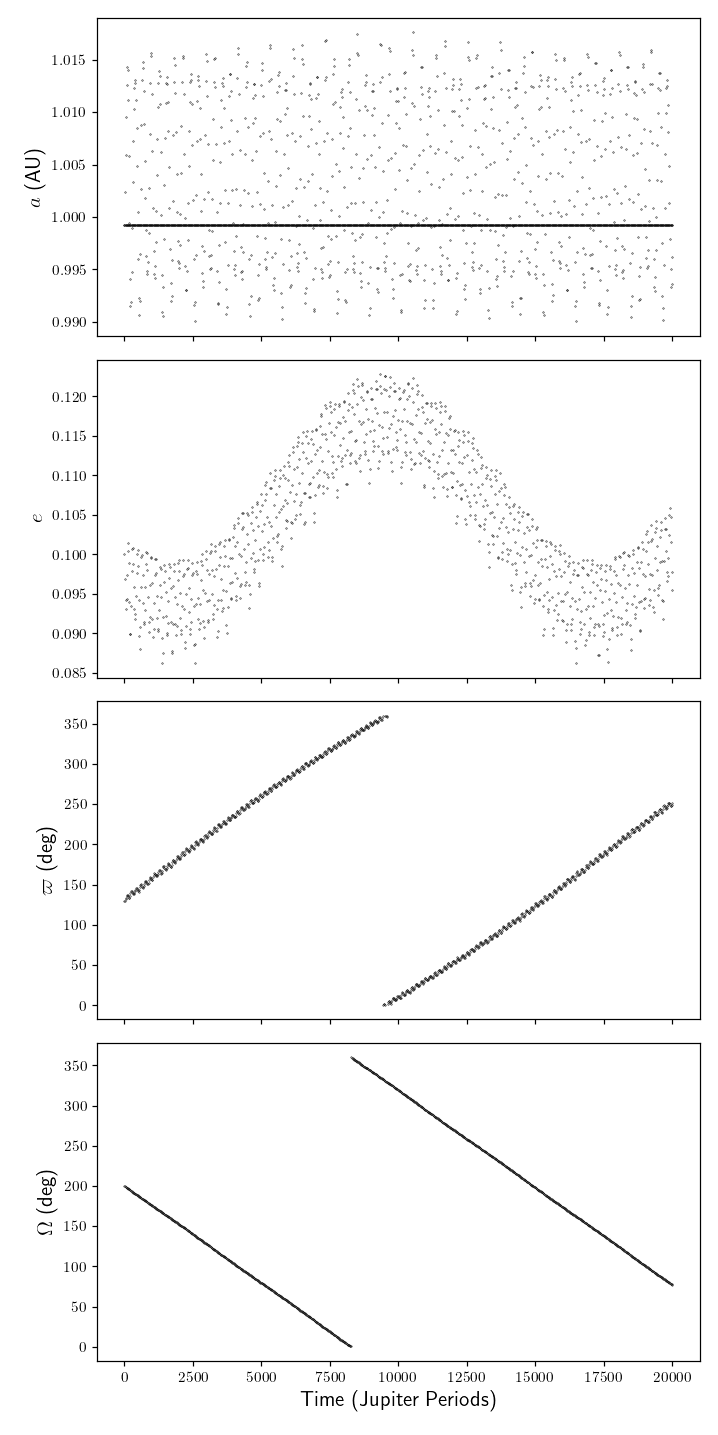

In [11]:
fig, axs = plt.subplots(4, 1, figsize=(6,12), sharex=True)
ax = fig.gca()
ax.set_xlabel('Time (Jupiter Periods)', fontsize=14)
axs[0].plot(ts/Pjup, Es[:,0], 'ko', ms=0.3);
axs[0].plot(ts/Pjup, a0+0*ts, 'ko', ms=0.3);
axs[0].set_ylabel(r'$a$ (AU)', fontsize=14);
axs[1].plot(ts/Pjup, Es[:,1], 'ko', ms=0.3);
axs[1].set_ylabel(r'$e$', fontsize=14);
axs[2].plot(ts/Pjup, Es[:,2]*rad, 'ko', ms=0.3);
axs[2].set_ylabel(r'$\varpi$ (deg)', fontsize=14);
axs[3].plot(ts/Pjup, Es[:,3]*rad, 'ko', ms=0.3);
axs[3].set_ylabel(r'$\Omega$ (deg)', fontsize=14);
fig.tight_layout()
#plt.savefig('figs/orbital_elements.png',dpi=300)
plt.show()